1: 14760
2: 4136
3: 921
4: 161
5: 31
6: 3
7: 2
8: 1
Height: 4, Aspect: 1.33


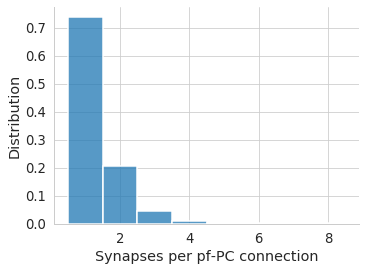

In [41]:
import collections
from collections import defaultdict
import sys
import json
import random
from jsmin import jsmin
from io import StringIO
import numpy as np
import copy
import importlib
from functools import partial
import math
import os
from scipy import stats
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')
import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData

# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'multi_syn_ratio_210708'

gzdb = '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/gen_db/pfs/' \
       'gen_210429_setup01_syndb_threshold_10_coalesced.gz'
#        'gen_201224_setup01_syndb_threshold_10_coalesced'
pf_pc_db = compress_pickle.load(gzdb)


1: 14760
2: 4136
3: 921
4: 161
5: 31
6: 3
7: 2
8: 1
Height: 4, Aspect: 1.33


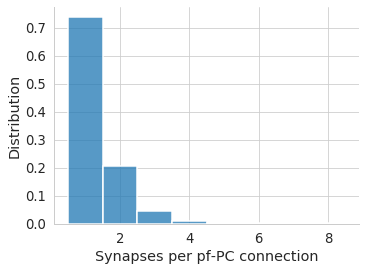

In [101]:

pc_pf_count = defaultdict(lambda: defaultdict(int))
for pf in pf_pc_db:
    for pc in pf_pc_db[pf]:
        for syn in pf_pc_db[pf][pc]:
            syn_loc = syn['syn_loc']
            pc_pf_count[pc][pf] += 1

hist = defaultdict(int)
mpd_raw = MyPlotData()
for pc in pc_pf_count:
    for pf in pc_pf_count[pc]:
        n_syns = pc_pf_count[pc][pf]
        hist[n_syns] += 1
        mpd_raw.add_data_point(
            num_syns=n_syns,
            group='Data')

mpd = MyPlotData()
for k in sorted([k for k in hist.keys()]):
    print(f'{k}: {hist[k]}')
    mpd.add_data_point(
        num_syns=k,
        count=hist[k],
        group='Data',
    )
mpd.add_pdf(key='count')



importlib.reload(my_plot); my_plot.my_displot(
    mpd_raw,
    x="num_syns",
    kind='hist',
    stat='probability',
    discrete=True,
    context='paper',
    height=4,
    y_axis_label='Distribution',
    x_axis_label='Synapses per pf-PC connection',
    show=True,
    save_filename=f'{script_n}_hist.svg',
    )


In [158]:

max_dist = 1500
min_pfs = 6

ignored_syn_locs = compress_pickle.load(f'multi_syn_ratio_210708_random_ignored_syn_locs_{max_dist}_{min_pfs}.gz')
ignored_syn_locs = set(ignored_syn_locs)

pc_pf_count = defaultdict(lambda: defaultdict(int))
for pf in pf_pc_db:
    for pc in pf_pc_db[pf]:
        for syn in pf_pc_db[pf][pc]:
            syn_loc = syn['syn_loc']
            if syn_loc in ignored_syn_locs:
                continue
            pc_pf_count[pc][pf] += 1

hist = defaultdict(int)
mpd_raw = MyPlotData()
for pc in pc_pf_count:
    for pf in pc_pf_count[pc]:
        n_syns = pc_pf_count[pc][pf]
        hist[n_syns] += 1
        mpd_raw.add_data_point(
            num_syns=n_syns,
            group='Data')

mpd = MyPlotData()
for k in sorted([k for k in hist.keys()]):
    print(f'{k}: {hist[k]}')
    mpd.add_data_point(
        num_syns=k,
        count=hist[k],
        group='Data',
    )
mpd.add_pdf(key='count')

# importlib.reload(my_plot); my_plot.my_displot(
#     mpd_raw,
#     x="num_syns",
#     kind='hist',
#     stat='probability',
#     discrete=True,
#     context='paper',
#     height=4,
#     y_axis_label='Distribution',
#     x_axis_label='Synapses per pf-PC connection',
#     show=True,
#     save_filename=f'{script_n}_hist.svg',
#     )


1: 11712
2: 2740
3: 492
4: 73
5: 8
6: 1


In [160]:
random_hist = compress_pickle.load(f'multi_syn_ratio_210708_random_hist_{max_dist}_{min_pfs}.gz')

Height: 4, Aspect: 1.33


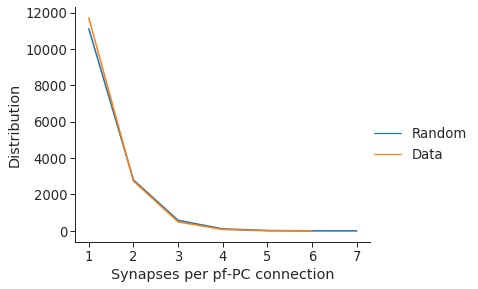

In [162]:

mpd_random = MyPlotData()
for k in sorted([k for k in random_hist.keys()]):
#     print(f'{k}: {random_hist[k]}')
    if k == 0 or k > 7:
        continue
    for count in random_hist[k]:
        mpd_random.add_data_point(
            num_syns=k,
            count=count,
            group='Random',
        )

mpd_all = MyPlotData()
mpd_all.append(mpd_random)
mpd_all.append(mpd)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd_all,
    x="num_syns",
    y="count",
    hue="group",
    kind='line',
#     stat='probability',
#     discrete=True,
    context='paper',
    height=4,
    y_axis_label='Distribution',
    x_axis_label='Synapses per pf-PC connection',
    show=True,
    save_filename=f'{script_n}_random_{max_dist}_{min_pfs}.svg',
    )



In [164]:
zscores = []
for k in range(7):
    compare_hist = copy.deepcopy(random_hist[k])
    compare_hist.append(hist[k])
    zscore = stats.zscore(compare_hist)[-1]
    zscores.append((k, zscore))

print(zscores)
mpd_zscore = MyPlotData()
for k, v in zscores:
    mpd_zscore.add_data_point(
        n_syns=k,
        zscore=v
    )
    

[(0, nan), (1, 6.0469055027221525), (2, -1.4095723792785004), (3, -3.871416495967133), (4, -3.7380477121487905), (5, -3.033909142011144), (6, -1.4540304485995281)]


Height: 4, Aspect: 1.33


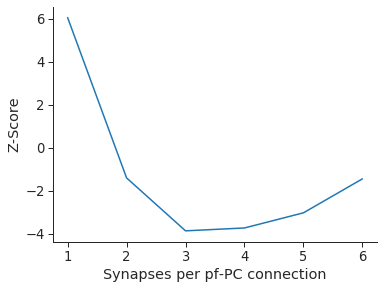

In [165]:

importlib.reload(my_plot); my_plot.my_relplot(
    mpd_zscore,
    x="n_syns",
    y="zscore",
#     hue="group",
    kind='line',
#     stat='probability',
#     discrete=True,
    context='paper',
    height=4,
    y_axis_label='Z-Score',
    x_axis_label='Synapses per pf-PC connection',
    show=True,
    save_filename=f'{script_n}_zscore_{max_dist}_{min_pfs}.svg',
    )

